In [91]:
using CosmoMMF
using PyPlot
using JLD2

plt.style.use("light_mode")

In [65]:
function plot_fields(sphere_field, cylinder_field, wall_field)
    """
    A helper plotting function to plot the projected density fields of the 
    sphere, cylinder, and wall.
    """

    f, axes = plt.subplots(3, 2, figsize=(8,12))
    
    #top left
    # ax1 = plt.subplot(321)
    field = sum(sphere_field, dims=2)
    axes[1, 1].imshow(field[:,1,:])
    axes[1, 1].set_title("Sphere-xz")
    
    #top right
    # ax2 = plt.subplot(322)
    field = sum(sphere_field, dims=3)
    axes[1, 2].imshow(field[:,:,1])
    axes[1, 2].set_title("Sphere-xy")
    axes[1, 2].set_xlabel("x-axis")
    axes[1, 2].set_ylabel("y-axis")
    #mid left
    # ax3 = plt.subplot(323)
    field = sum(cylinder_field, dims=2)
    axes[2, 1].imshow(field[:,1,:])
    axes[2, 1].set_title("Cylinder-xz")
    
    #mid right
    # ax4 = plt.subplot(324)
    field = sum(cylinder_field, dims=3)
    axes[2, 2].imshow(field[:,:,1])
    axes[2, 2].set_title("Cylinder-xy")
    
    #bottom left
    # ax5 = plt.subplot(325)
    field = sum(wall_field, dims=2)
    axes[3, 1].imshow(field[:,1,:])
    axes[3, 1].set_title("Wall-xz")
    
    #bottom right
    # ax6 = plt.subplot(326)
    field = sum(wall_field, dims=3)
    axes[3, 2].imshow(field[:,:,1])
    axes[3, 2].set_title("Wall-xy")
    

    for i in 1:3
        for j in 1:2
            if j == 1
                axes[i, j].set_xlabel("x-axis")
                axes[i, j].set_ylabel("z-axis")
            elseif j == 2
                axes[i, j].set_xlabel("x-axis")
                axes[i, j].set_ylabel("y-axis")
            end
            
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            axes[i, j].set_xticklabels([])
            axes[i, j].set_yticklabels([])
            
        end
    end

    f.tight_layout()
    plt.show()
end

plot_fields (generic function with 1 method)

In [69]:
resolution = 64

64

### Make Test Density Fields

In [70]:
sphere_field = CosmoMMF.sphere(resolution,5.0)
cylinder_field = CosmoMMF.cylinder(resolution,5.0)
wall_field = CosmoMMF.wall(resolution)

print("Create Test Case Density Fields")

Create Test Case Density Fields

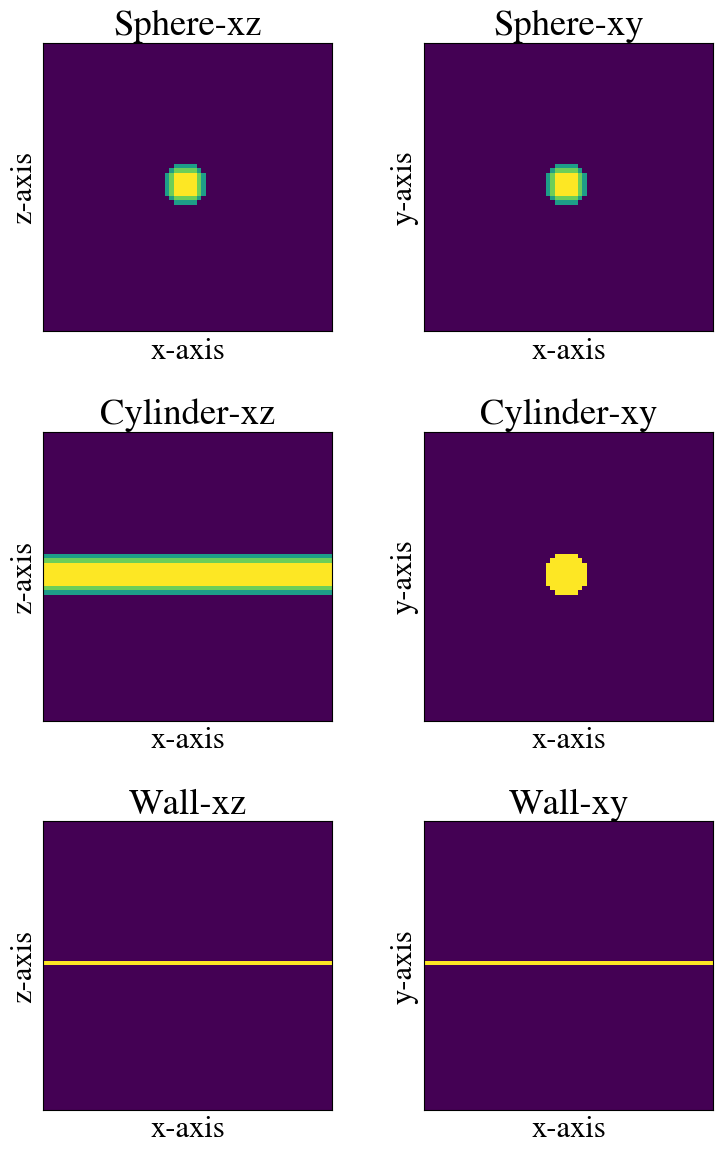

In [71]:
plot_fields(sphere_field, cylinder_field, wall_field)

### Perform Smoothing


#### Log Smoothing - NEXUS+

In [72]:
wave_vecs = CosmoMMF.wavevectors3D((resolution,resolution,resolution))

log_smooth_sphere_field = CosmoMMF.smooth_loggauss(sphere_field, 4.0, wave_vecs)
log_smooth_cylinder_field = CosmoMMF.smooth_loggauss(cylinder_field, 4.0, wave_vecs)
log_smooth_wall_field = CosmoMMF.smooth_loggauss(wall_field, 4.0, wave_vecs)

print("log smoothing")

log smoothing

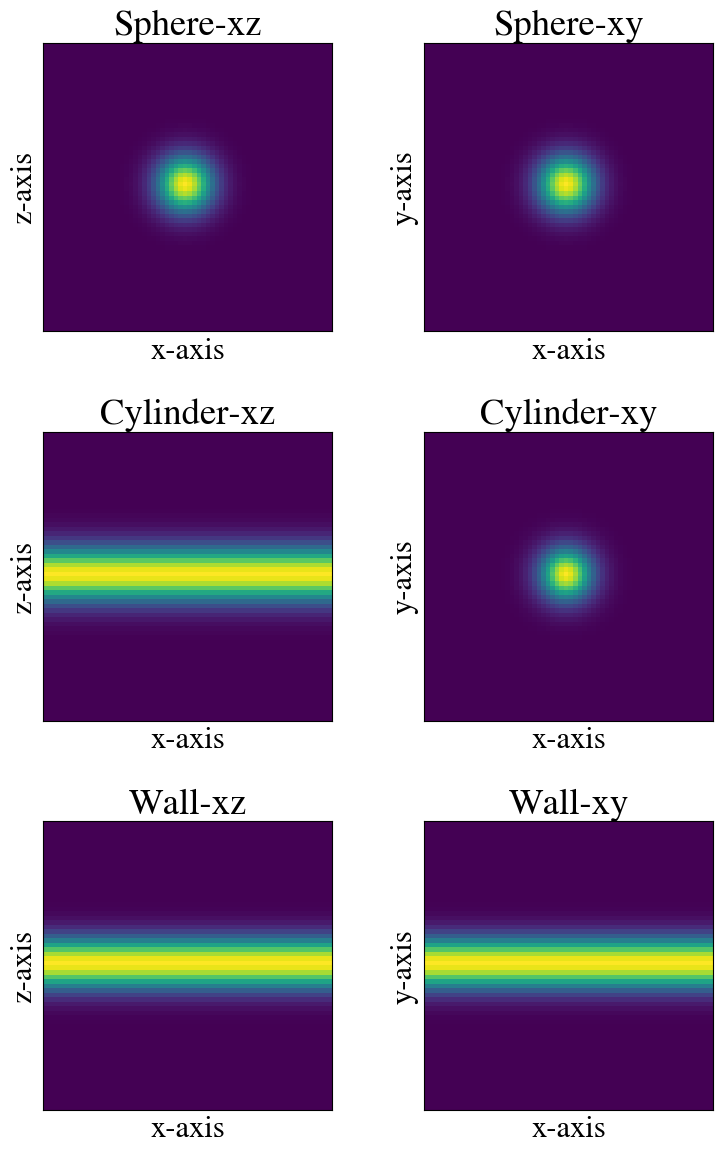

In [73]:
plot_fields(log_smooth_sphere_field, log_smooth_cylinder_field, log_smooth_wall_field)

#### Normal Smoothing - NEXUS

In [74]:
wave_vecs = CosmoMMF.wavevectors3D((resolution,resolution,resolution))

smooth_sphere_field = CosmoMMF.smooth_gauss(sphere_field, 4.0, wave_vecs)
smooth_cylinder_field = CosmoMMF.smooth_gauss(cylinder_field, 4.0, wave_vecs)
smooth_wall_field = CosmoMMF.smooth_gauss(wall_field, 4.0, wave_vecs)

print("standard smoothing")

standard smoothing

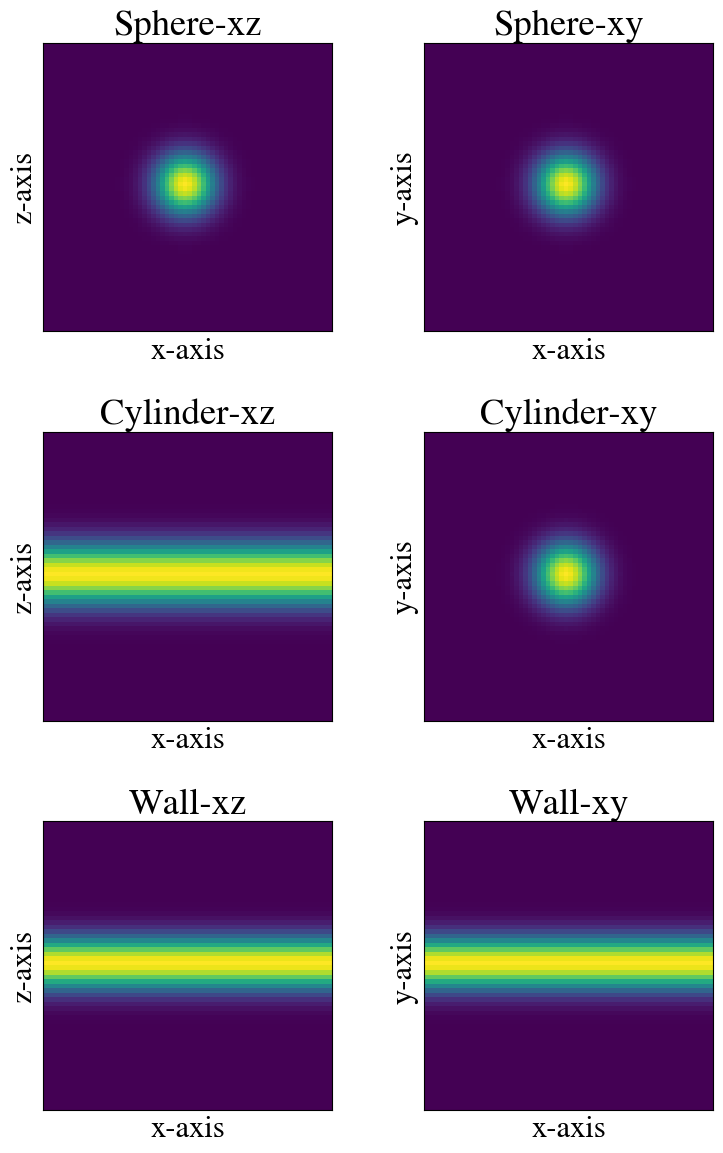

In [75]:
plot_fields(smooth_sphere_field, smooth_cylinder_field, smooth_wall_field)

In [80]:
Rs = (√2) .^ 5

#use Nexus+ by Default
max_sigs_sphere = CosmoMMF.maximum_signature(Rs, sphere_field)
max_sigs_cylinder = CosmoMMF.maximum_signature(Rs, cylinder_field)
max_sigs_wall = CosmoMMF.maximum_signature(Rs, wall_field)

print("calculate the Maximum Signatures 𝒮")

calculate the Maximum Signatures 𝒮

In [81]:
size(max_sigs_sphere)

(64, 64, 64, 3)

In [101]:
output_directory = "/global/homes/j/james12/CosmoMMF/notebooks/Temp_data/"

save_name = "test_sphere"
max_sigs_sphere_RR = CosmoMMF.reduce_RAM_maximum_signature(Rs, output_directory, save_name, sphere_field)
@load "Temp_data/max_sigs_test_sphere_full_signatures.jld2" sigmax
max_sigs_sphere_RR = sigmax

save_name = "test_cylinder"
max_sigs_cylinder_RR = CosmoMMF.reduce_RAM_maximum_signature(Rs, output_directory, save_name, cylinder_field)
@load "Temp_data/max_sigs_test_cylinder_full_signatures.jld2" sigmax
max_sigs_cylinder_RR = sigmax

save_name = "test_wall"
max_sigs_wall_RR = CosmoMMF.reduce_RAM_maximum_signature(Rs, output_directory, save_name, wall_field)
@load "Temp_data/max_sigs_test_wall_full_signatures.jld2" sigmax
max_sigs_wall_RR = sigmax

print("compute max sigs Reduced RAM")

# max_sigs_cylinder_RR = CosmoMMF.reduce_RAM_maximum_signature(Rs, output_directory, save_name, cylinder_field)
# max_sigs_wall_RR = CosmoMMF.reduce_RAM_maximum_signature(Rs, output_directory, save_name, wall_field)


Computing All Hessian Values: 

Compiling Hessians & Calculating Max Signatures: 

Computing All Hessian Values: 

Compiling Hessians & Calculating Max Signatures: 

Computing All Hessian Values: 

Compiling Hessians & Calculating Max Signatures: 
compute max sigs Reduced RAM

In [83]:
# plot_fields(max_sigs_sphere[:,:,:,1], max_sigs_cylinder[:,:,:,1], max_sigs_wall[:,:,:,1])
# plot_fields(max_sigs_sphere[:,:,:,2], max_sigs_cylinder[:,:,:,2], max_sigs_wall[:,:,:,2])
# plot_fields(max_sigs_sphere[:,:,:,3], max_sigs_cylinder[:,:,:,3], max_sigs_wall[:,:,:,3])

In [126]:
bool_filter = sphere_field .== 1
max_sigs_sphere[bool_filter,:] == max_sigs_sphere_RR[bool_filter, :]

true

In [125]:
bool_filter = cylinder_field .== 1
max_sigs_cylinder[bool_filter,:] == max_sigs_cylinder_RR[bool_filter, :]

true

In [127]:
bool_filter = wall_field .== 1
max_sigs_wall[bool_filter,:] == max_sigs_wall_RR[bool_filter, :]

true

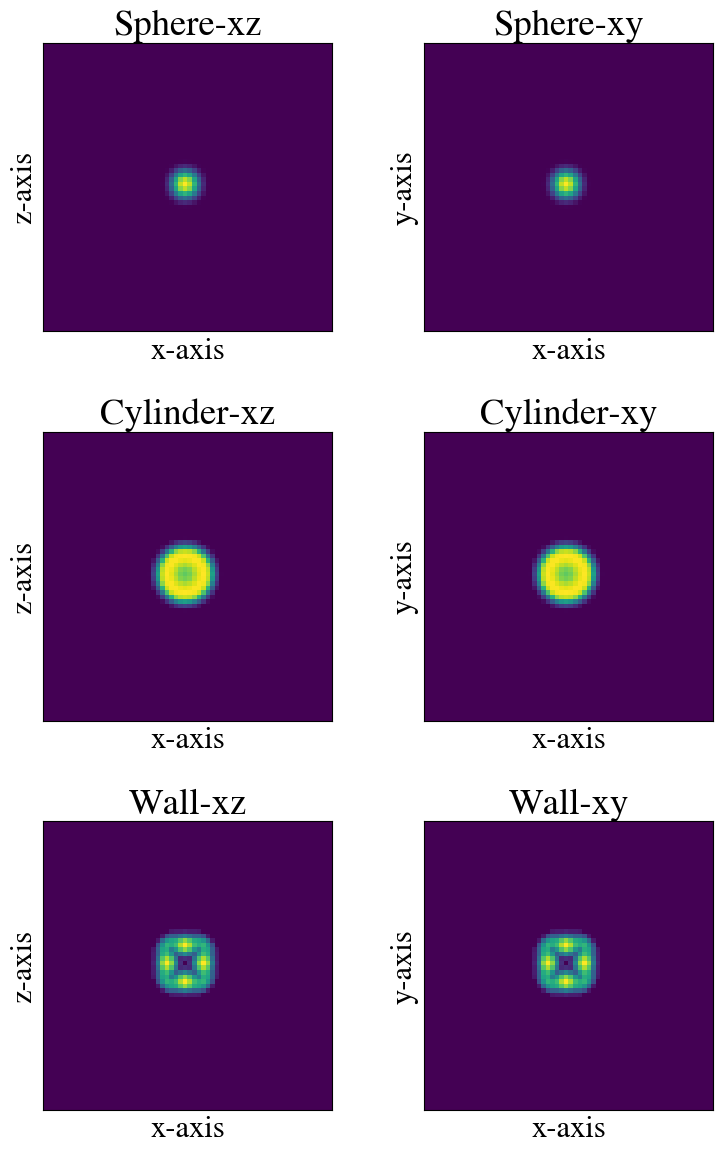

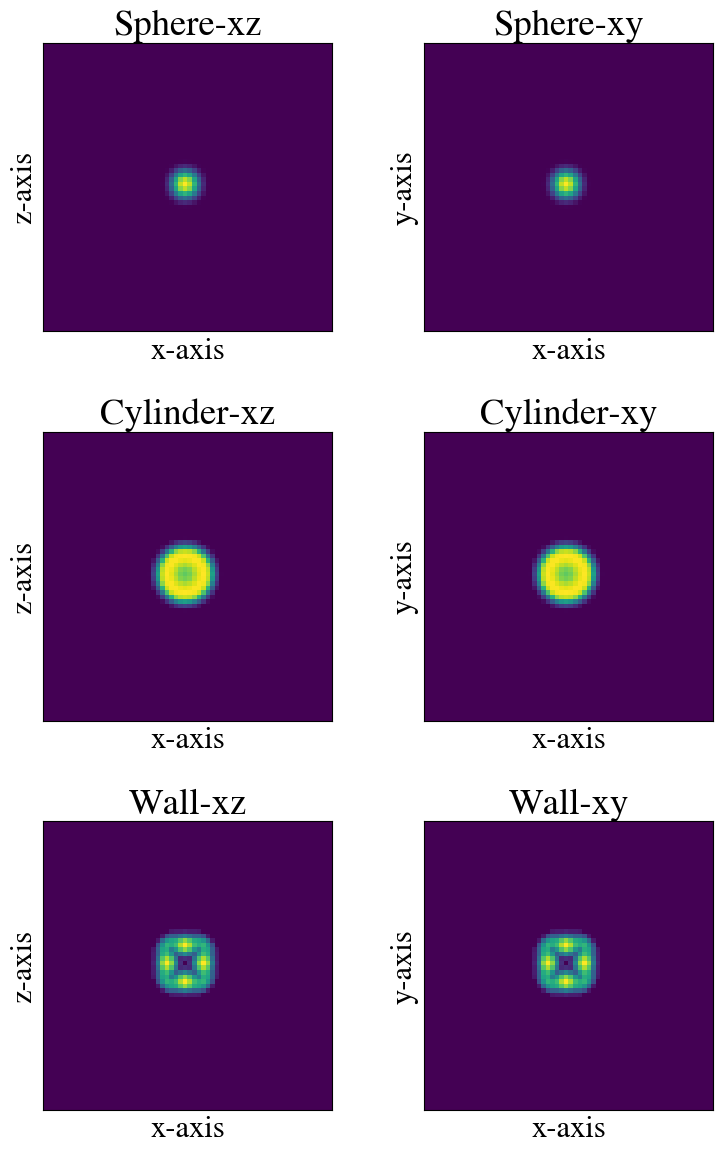

In [99]:
plot_fields(max_sigs_sphere[:,:,:,1], max_sigs_sphere[:,:,:,2], max_sigs_sphere[:,:,:,3])
plot_fields(max_sigs_sphere_RR[:,:,:,1], max_sigs_sphere_RR[:,:,:,2], max_sigs_sphere_RR[:,:,:,3])



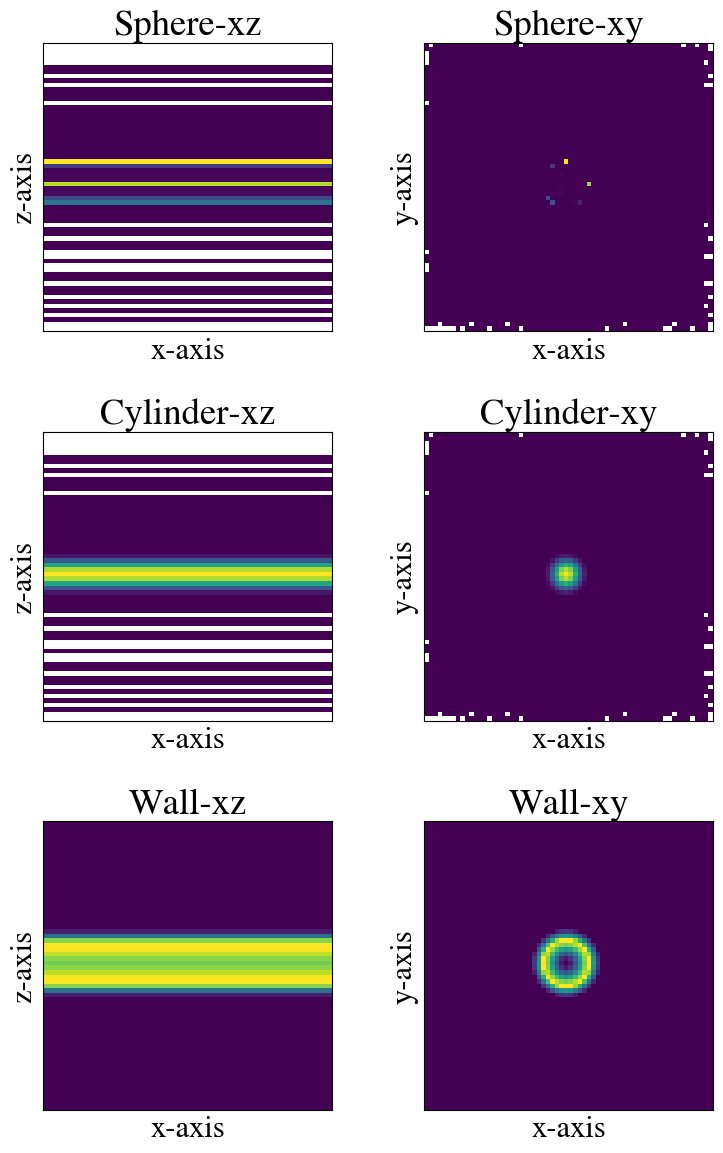

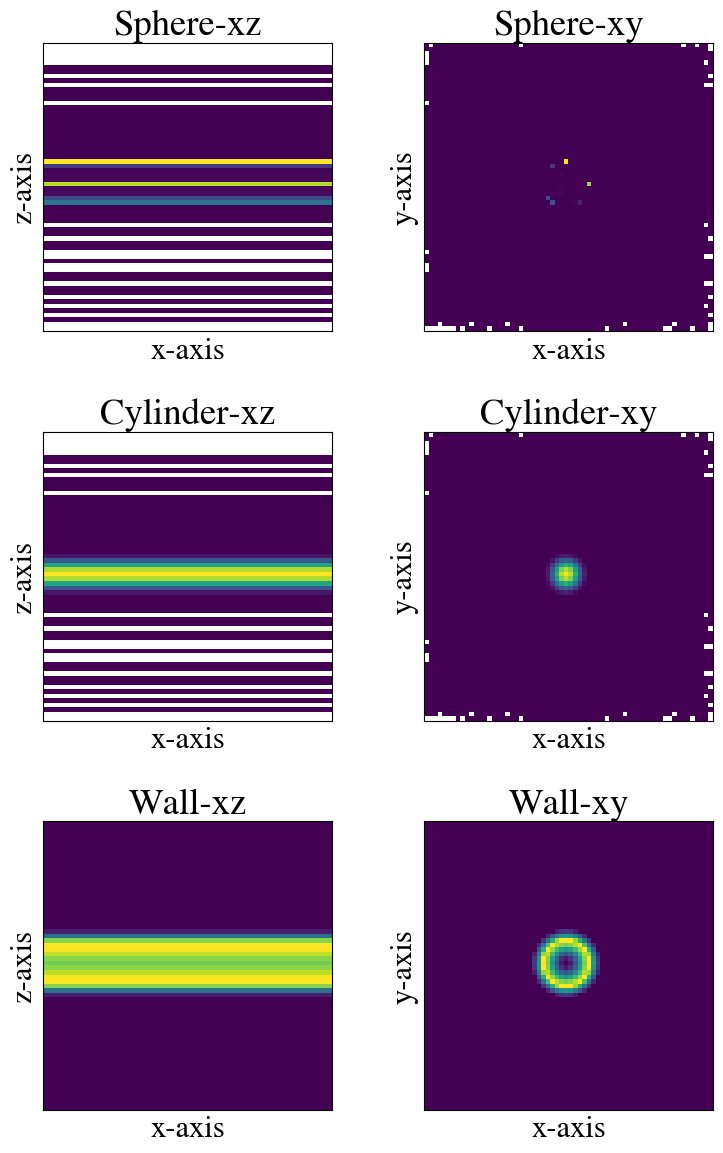

In [109]:
plot_fields(max_sigs_cylinder[:,:,:,1], max_sigs_cylinder[:,:,:,2], max_sigs_cylinder[:,:,:,3])
plot_fields(max_sigs_cylinder_RR[:,:,:,1], max_sigs_cylinder_RR[:,:,:,2], max_sigs_cylinder_RR[:,:,:,3])



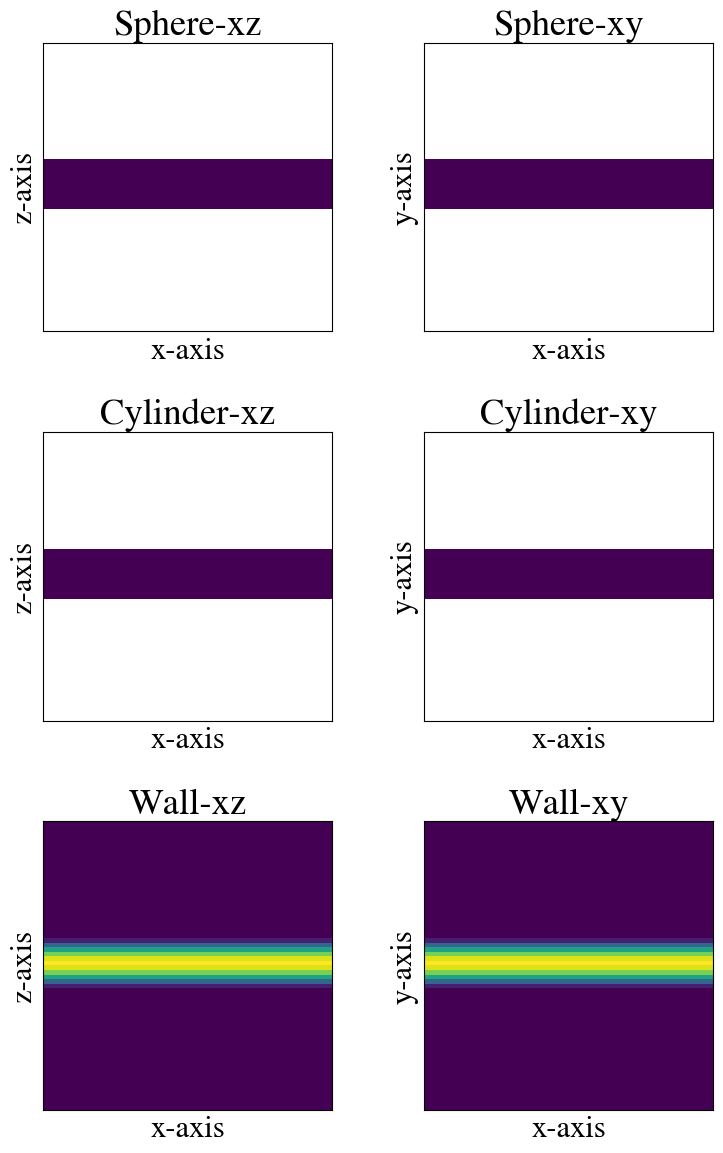

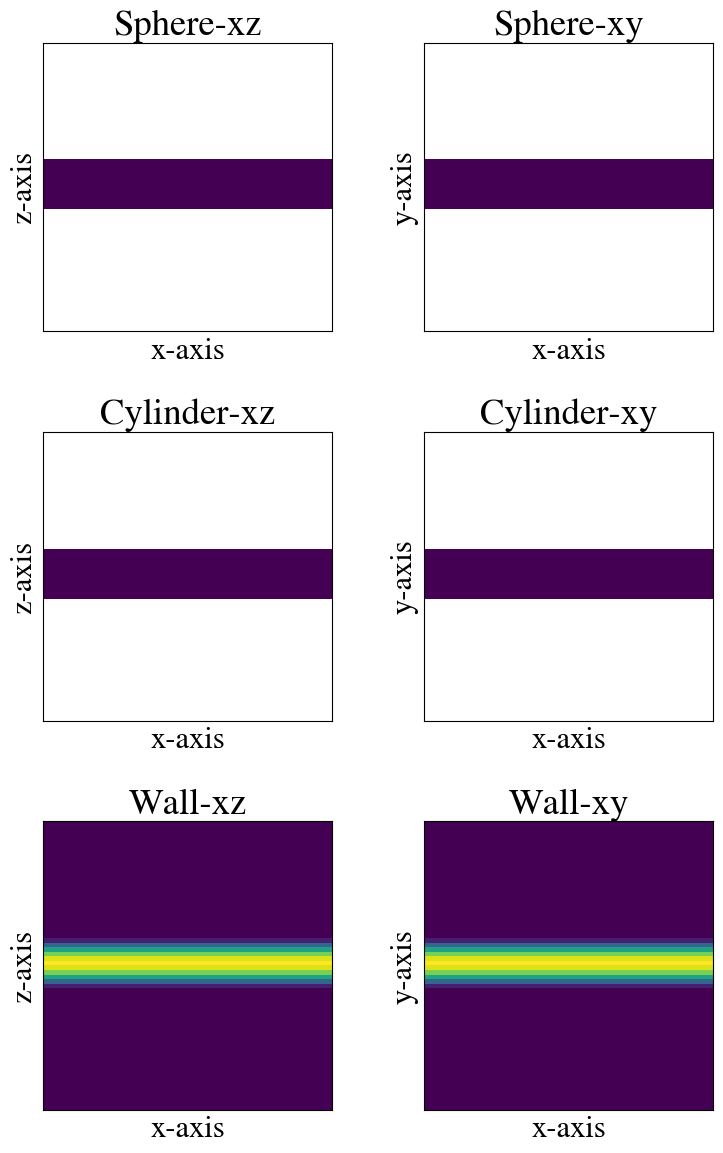

In [110]:
plot_fields(max_sigs_wall[:,:,:,1], max_sigs_wall[:,:,:,2], max_sigs_wall[:,:,:,3])
plot_fields(max_sigs_wall_RR[:,:,:,1], max_sigs_wall_RR[:,:,:,2], max_sigs_wall_RR[:,:,:,3])

